### Curso: Tecnologia em Análise e Desenvolvimento de Sistemas
### Disciplina: Disruptive Architectures - IOT, IOB e IA
### Turmas: 2TDSPR, 2TDSPS e 2TDSPT
#### Prof. André Tritiack: prof.andrefarias@fiap.com.br
#### 2º Semestre de 2023

## CHECKPOINT 1 - Pontuação Máxima: 10.00 pontos

LEIA ATENTAMENTE AS INSTRUÇÕES:

1.	O trabalho deve ser realizado em grupo de até 5 (cinco) pessoas. Não precisa necessariamente ser o mesmo grupo do Challenge.

2. O conteúdo relacionado a este Checkpoint refere-se aos algoritmos de Aprendizado de Máquina Não Supervisionados de Agrupamento (K-Means) e Redução de Dimensionalidade (PCA - Principal Component Analysis).

3.	Você deverá submeter uma cópia deste arquivo notebook .ipynb com as respostas nos campos indicados e as saídas executadas. Anexe os arquivos auxiliares que utilizar.

4. É fundamental que sejam criadas células de texto e/ou comentários para suas respostas e apontamentos.

5.	Apenas um aluno submeterá o arquivo no Teams. Mude o nome do arquivo notebook para um nome com as iniciais do seu nome completo (de quem submeterá o arquivo), seguido do seu RM e "CP1". Exemplo: ATF12000 - CP1

6.	A entrega deverá ser feita até às 23h59 do dia 10/09/2023 na respectiva tarefa no Microsoft Teams.

7.	As pontuações das questões estão marcadas nos enunciados.

8.	Você pode usar trechos de códigos prontos, de fontes pesquisadas ou de notebooks das aulas, mas não copie de outros grupos. Se forem observados arquivos iguais ou muito semelhantes, ambos serão desconsiderados, tendo suas notas zeradas.

9. Tire suas dúvidas com o professor e não deixe a entrega para o último dia.


- Alicia Vitória Guiradelo da Silva - RM: 96960.
- Ana Carolina Dantas Prado - RM: 96997.
- Arthur Foschiani de Souza - RM: 96525.
- Bruna Menegatti Vienna - RM: 96848.
- Larah Rangel Feliciano Correa - RM: 96384.

# Questão 1 (2.50 pontos):

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.

In [1]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregar dados
df = pd.read_csv('Mall_Customers.csv', delimiter = ',')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Criar tabela com as colunas Annual Income e Spending Score
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [4]:
# Cálculo da soma dos quadrados intracluster
distorcoes = []
K = range(1,12)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

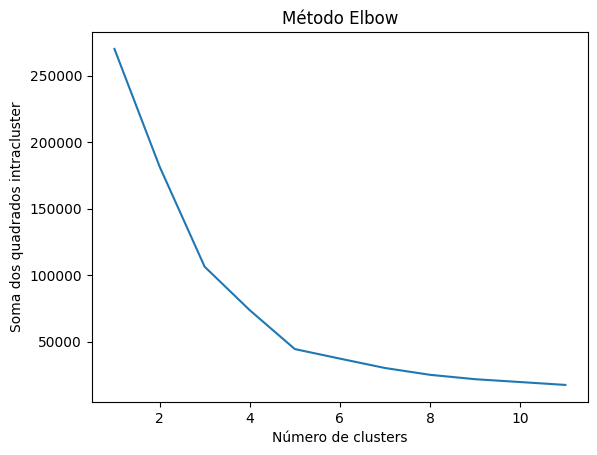

In [5]:
# Plotagem do gráfico
plt.plot(range(1, 12), distorcoes)
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos quadrados intracluster")
plt.show()

O valor ideal de k determinamos utilizando o método Elbow. Esse método consiste em plotar o valor da soma dos quadrados intracluster em função de k.

O gráfico mostra que a soma dos quadrados começa a diminuir de forma significativa a partir de k = 5. Portanto, o valor ideal de k para o dataset "Mall Customers" é 5.

Após determinar o valor de k, podemos treinar o modelo K-Means com 5 clusters. Para isso, utilizaremos a biblioteca scikit-learn.

In [6]:
# Treinamento do modelo
kmeanModel = KMeans(n_clusters=5)
y_pred = kmeanModel.fit_predict(df)

Avaliando a qualidade dos clusters, utilizando a métrica Silhoutte Score, obtemos o seguinte resultado:

In [7]:
silhouette_score = silhouette_score(df, y_pred)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.553931997444648


O resultado mostra que o Silhoutte Score é de 0,55, o que indica que os clusters são de boa qualidade.

A seguir, apresento a distribuição dos clientes nos 5 clusters:

In [8]:
# Distribuição dos clientes nos clusters
for i in range(5):
    print(f"Cluster {i + 1}: {len(y_pred[y_pred == i])}")

Cluster 1: 39
Cluster 2: 23
Cluster 3: 35
Cluster 4: 22
Cluster 5: 81


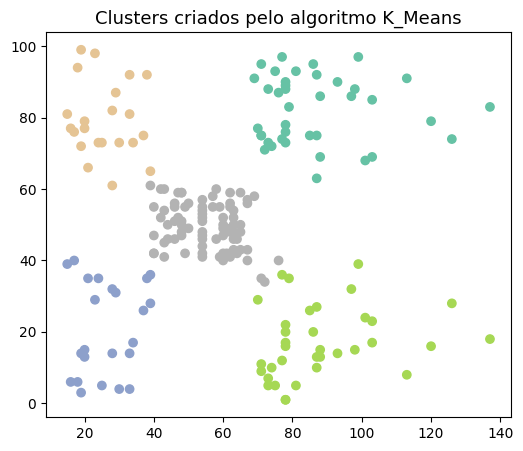

In [9]:
# Visualização grafica do agrupamento dos clusters criada pelo algoritmo K-Means
plt.figure(figsize=(6,5))
df['k_means'] =kmeanModel.predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['k_means'], cmap=plt.cm.Set2)
plt.title('Clusters criados pelo algoritmo K_Means', fontsize=13)
plt.show()

O algoritmo K-Means foi capaz de agrupar os clientes em cinco clusters, com base nas características de receita anual e pontuação de gastos. Dessa forma, pudemos tirar algumas decisões:

- Cluster 1: Clientes com alta renda e alta pontuação de gastos.
- Cluster 2: Clientes com alta renda e baixa pontuação de gastos.
- Cluster 3: Clientes com renda média e alta pontuação de gastos.
- Cluster 4: Clientes com renda média e baixa pontuação de gastos.
- Cluster 5: Clientes com baixa renda e baixa pontuação de gastos.

# Questão 02 (1.50 pontos):

- Usando o dataset Iris, utilize a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresente os resultados.

In [10]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets

In [11]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

Agora, aplicamos o PCA ao conjunto de dados, especificando que queremos reduzir a dimensionalidade para dois componentes principais:

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

A função fit_transform() calcula os componentes principais e os aplica ao conjunto de dados. Os componentes principais são armazenados na variável X_pca.

In [13]:
# Criando um DataFrame para visualização
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Target'] = y

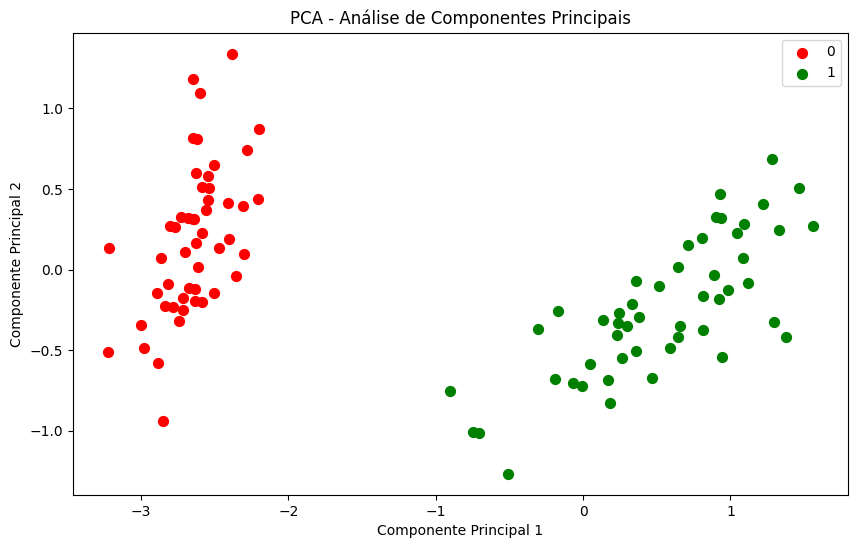

In [14]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(
        pca_df.loc[indices_to_keep, 'Componente Principal 1'],
        pca_df.loc[indices_to_keep, 'Componente Principal 2'],
        c=color,
        s=50,
    )
plt.legend(targets)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Análise de Componentes Principais')
plt.show()

O gráfico mostra que os dados estão bem separados de acordo com suas espécies. Isso sugere que a PCA foi bem-sucedida em preservar a informação relevante contida no conjunto de dados original.

Para avaliar a qualidade da redução de dimensionalidade, podemos calcular a variância explicada pelos componentes principais. A variância explicada é a proporção da variância total dos dados que é explicada por cada componente principal.

In [15]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


Esse resultado indica que o primeiro componente principal explica 92,46% da variância total dos dados, enquanto o segundo componente principal explica 5,30%. Isso significa que, ao reduzir a dimensionalidade do conjunto de dados para dois componentes principais, estamos perdendo apenas 0,02% da informação relevante.

Em conclusão, a PCA foi bem-sucedida em reduzir a dimensionalidade do conjunto de dados Iris sem perder muita informação. Os dois componentes principais obtidos são capazes de representar de forma eficaz as diferenças entre as três espécies de flores.

# Questão 03 (6.00 pontos):

- Escolher um dataset de sua preferência que possua ao menos uma coluna com valores categóricos para ser utilizada como "Target".

- Não utilize os datasets utilizados em aula (Mall Customers, Iris, House Power Consumption e Adult Census).

- Aplicar a técnica de redução de dimensionalidade, usando o algoritmo PCA.

- Com base no novo dataset (após a aplicação da redução), utilizar um algoritmo de classificação treinar um modelos de classificação e calcular sua acurácia.

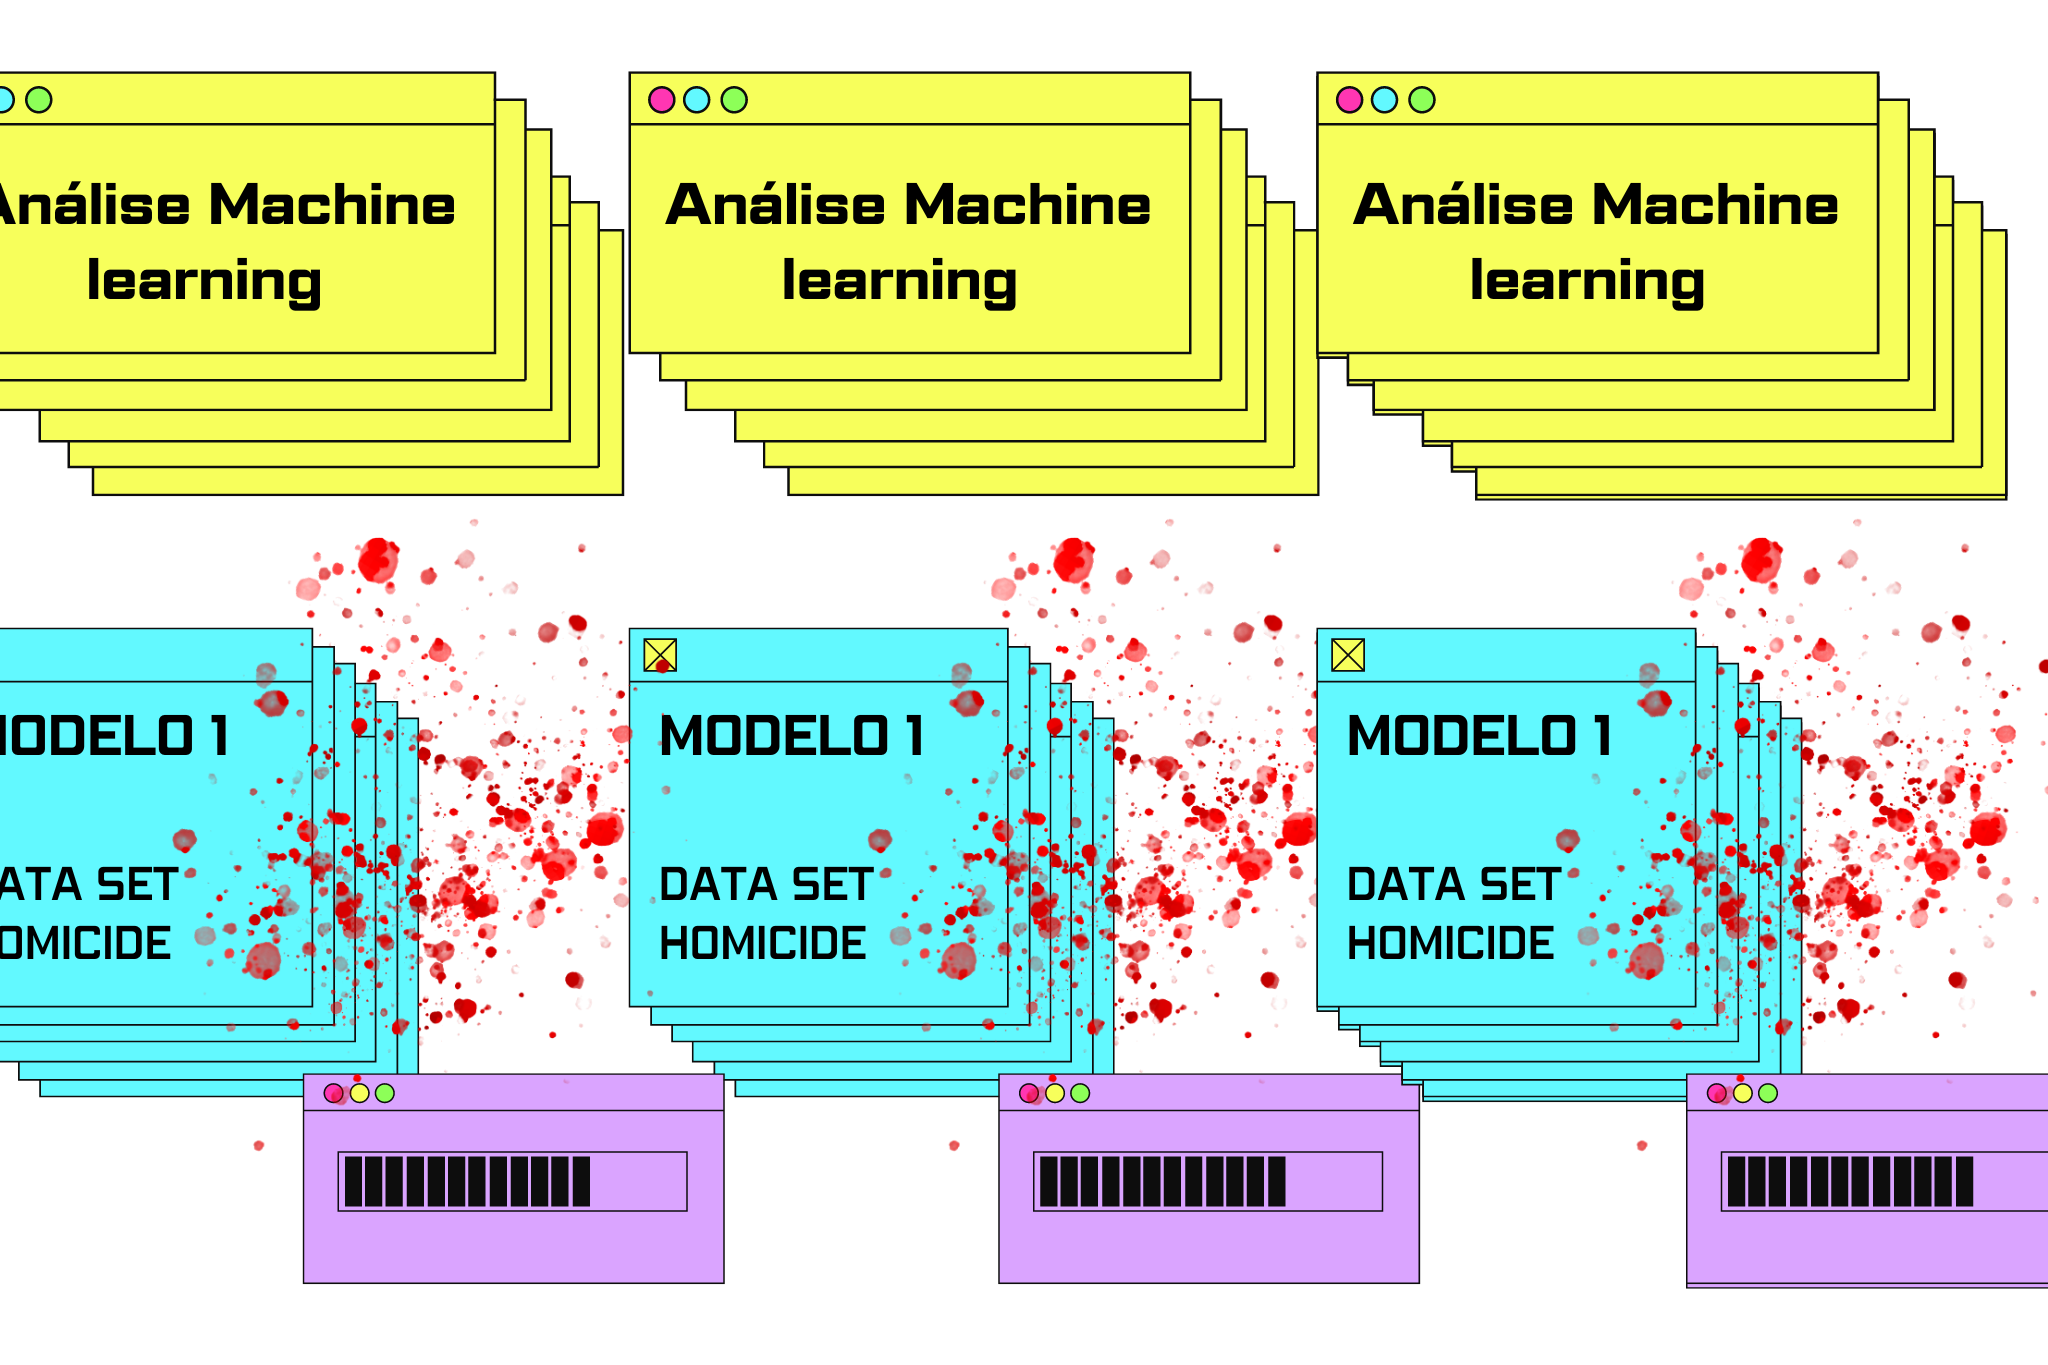

# [Data Homicides](https://www.kaggle.com/datasets/joebeachcapital/homicides)



Escolhemos um conjunto de dados relacionados a homicídios criminais nos Estados Unidos, que foi coletado pelo jornal The Washington Post ao longo de mais de uma década em 50 das maiores cidades do país. Esses dados abrangem informações essenciais, como a localização dos homicídios, se houve prisões relacionadas e, na maioria dos casos, informações demográficas básicas sobre cada vítima.

A coleta de dados foi um processo abrangente, pois os jornalistas receberam informações em diversos formatos, incluindo documentos em papel. Eles trabalharam incansavelmente por meses para limpar e padronizar esses dados, ainda sim o sistema e talvez por isso o enconding dele não é o mais atual, Utf-8, o que nos fez já no começo ter que modificar o processo de leitura do dados. Além disso, eles compararam as contagens de homicídios e as taxas de solução dos casos com os dados do FBI para garantir que os registros fossem tão precisos quanto possível.

In [16]:
# Importação das Bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Carregar o dataset
data = pd.read_csv("homicide-data.csv", encoding="ISO-8859-1")
df = data[['reported_date', 'victim_race', 'victim_age', 'victim_sex', 'city', 'state', 'disposition']]

Carregamos nosso conjunto de dados de homicídios e selecionamos as colunas que são relevantes para a nossa análise.

Dados incompletos ou desconhecidos podem confundir nosso modelo. Vamos remover as linhas nas quais a idade da vítima é 'Unknown'. Depois, precisamos converter algumas colunas, como 'reported_date', para um formato numérico, para que os modelos possam entendê-las.

Modelos de machine learning preferem números a palavras. Então, vamos transformar nossas colunas categóricas, em números.

In [18]:
# Pré-processamento
df = df[df['victim_age'] != "Unknown"]
df['reported_date'] = pd.to_numeric(df['reported_date'])

label_encoders = {
    'victim_race': LabelEncoder(),
    'victim_age': LabelEncoder(),
    'victim_sex': LabelEncoder(),
    'city': LabelEncoder(),
    'state': LabelEncoder(),
    'disposition': LabelEncoder()
}

for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])

display(df.head())

,reported_date,victim_race,victim_age,victim_sex,city,state,disposition
0,20100504,2,78,1,0,17,1
1,20100216,2,11,1,0,17,0
2,20100601,5,9,0,0,17,1
3,20100101,2,28,1,0,17,0
4,20100102,5,72,0,0,17,1


Antes de treinar nosso modelo, dividimos nosso conjunto de dados em dois: um conjunto de treino e um conjunto de teste. O primeiro é usado para ensinar o modelo e o segundo para testá-lo.

In [19]:
# Separar o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop("victim_race", axis=1), df["victim_race"], test_size=0.2)

Modelos, especialmente alguns como KNN, funcionam melhor quando os dados estão em uma escala similar. Vamos padronizá-los para que todos tenham média 0 e desvio padrão 1.

In [20]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

O método PCA (Análise de Componentes Principais) é frequentemente empregado para reduzir a dimensionalidade dos dados. Essa técnica é valiosa por vários motivos: ela permite eliminar colunas altamente correlacionadas, que podem se tornar redundantes e aumentar desnecessariamente o custo computacional; além disso, contribui para abordar questões relacionadas à privacidade dos dados.

Ao reduzir a dimensionalidade dos dados, o PCA transforma as informações em números, tornando-os mais difíceis de serem decifrados. Isso é particularmente relevante em casos sensíveis, como investigações de homicídio. A redução de colunas pode, de fato, obscurecer a interpretação dos dados, tornando mais difícil a identificação de padrões ou informações sensíveis, uma vez que os dados resultantes podem estar correlacionados com várias colunas simultaneamente. Portanto, o uso do PCA pode ser uma consideração importante ao lidar com informações delicadas, como as relacionadas a homicídios.

In [21]:
from sklearn.decomposition import PCA

# Suponha que você já tenha definido X_train e X_test

# Número de componentes principais desejado
p = 5

# Aplica o PCA aos dados de treinamento
pca_train = PCA(n_components=p)
X_train_pca = pca_train.fit_transform(X_train)

# Aplica o PCA aos dados de teste usando as mesmas transformações aprendidas nos dados de treinamento
X_test_pca = pca_train.transform(X_test)

explained_var_ratio_train = pca_train.explained_variance_ratio_.cumsum()
total_variancia_train = pca_train.explained_variance_ratio_.sum()

explained_var_ratio_test = (pca_train.transform(X_test) ** 2).sum(axis=1) / ((X_test - X_test.mean(axis=0)) ** 2).sum(axis=0).sum()
total_variancia_test = explained_var_ratio_test.sum()

print(f'O modelo PCA com {p} variáveis explica {100 * total_variancia_train:.2f}% dos dados de treinamento')
print(f'O modelo PCA com {p} variáveis explica {100 * total_variancia_test:.2f}% dos dados de teste')


O modelo PCA com 5 variáveis explica 85.97% dos dados de treinamento
O modelo PCA com 5 variáveis explica 85.99% dos dados de teste


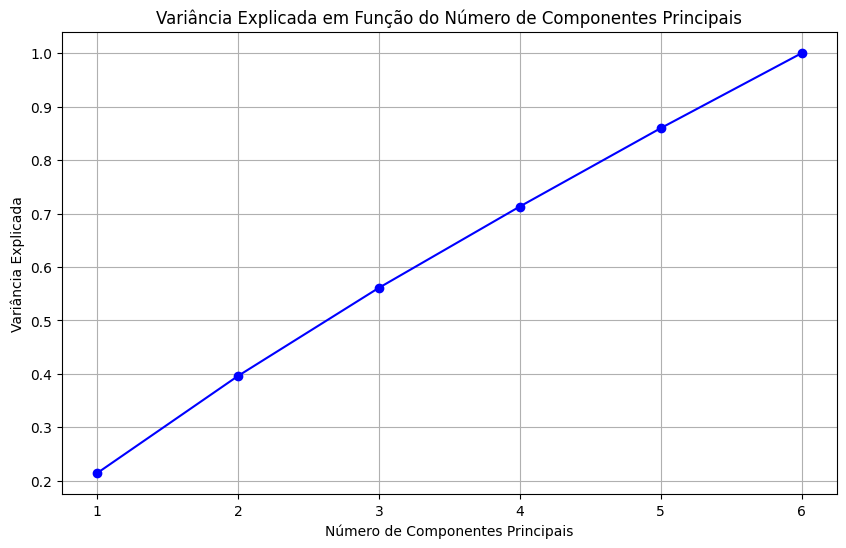

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Suponha que você já tenha definido X_train

# Lista para armazenar as variâncias explicadas
explained_variances = []

# Números de componentes principais que você deseja avaliar
n_components_range = range(1, 7)  # Vai de 1 a 6 componentes principais

for p in n_components_range:
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    explained_variance = pca.explained_variance_ratio_.sum()
    explained_variances.append(explained_variance)

# Criar um gráfico de linha para mostrar a variância explicada em função do número de componentes
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variances, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada em Função do Número de Componentes Principais')
plt.grid(True)
plt.show()


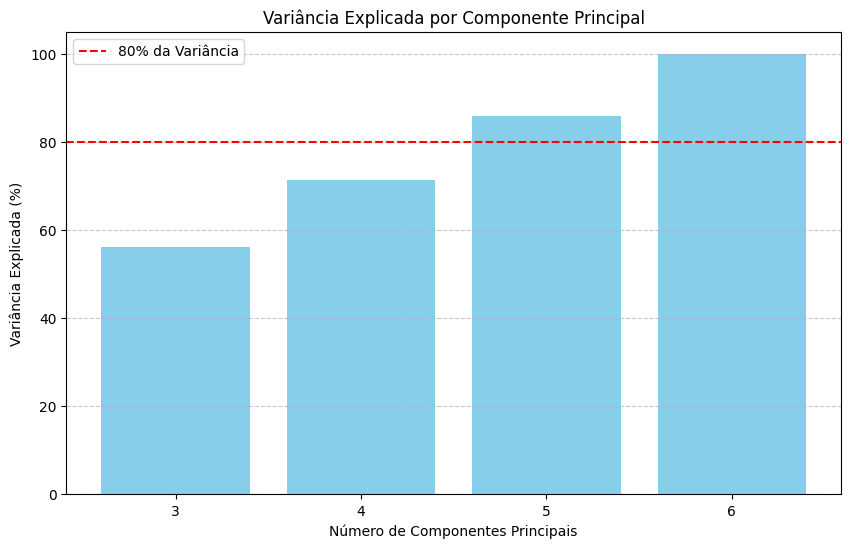

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Suponha que você já tenha definido X_train

# Números de componentes principais que você deseja avaliar
n_components_range = range(3, 7)  # Avaliando de 3 a 6 componentes principais

# Lista para armazenar as porcentagens de variância explicada
variance_explained = []

for p in n_components_range:
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    explained_variance = pca.explained_variance_ratio_.sum()
    variance_explained.append(explained_variance * 100)  # Multiplicar por 100 para obter porcentagem

# Valor desejado de 80% da variância explicada
desired_variance = 80

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(n_components_range, variance_explained, color='skyblue')
plt.axhline(y=desired_variance, color='red', linestyle='--', label=f'{desired_variance}% da Variância')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada (%)')
plt.title('Variância Explicada por Componente Principal')
plt.xticks(n_components_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()


Tentamos fazer do jeito ensinado mas percebemos que, por ser aleatório, toda vez que o notebook for rodado ele tera variações nos resultados então depois de olharmos graficamente chegamos em um código que nos da a quantidade de componente que explica pelo menos 80% do dados.

In [24]:
from sklearn.decomposition import PCA

# Suponha que você já tenha definido X_train

# Define o limite de variância explicada desejada
variance_threshold = 0.80

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Encontre o número de componentes necessários para atingir ou exceder o limite desejado
optimal_n_components = np.argmax(explained_variance >= variance_threshold) + 1

# Imprima o número ótimo de componentes
print(f'Número de componentes para {variance_threshold * 100:.2f}% de variância explicada: {optimal_n_components}')

# Reduza a dimensionalidade dos dados de treinamento para o número ótimo de componentes
X_train_pca = X_train_pca[:, :optimal_n_components]


Número de componentes para 80.00% de variância explicada: 5


In [25]:
X_train_pca.shape, X_test_pca.shape

((39344, 5), (9836, 5))

Após treinarmos diversos modelos com os nossos dados, incluindo Random Forest, Regressão Logística, SVM e KNN, agora é hora de avaliar o seu desempenho. Ao final da análise, apresentaremos as métricas de desempenho, com destaque para a acurácia, para cada um dos modelos.

In [26]:
# 4. Modelos e Avaliação
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModelo: {name}")
    print(f"Acurácia: {accuracy}")
    print(classification_report(y_test, y_pred))


Modelo: Random Forest
Acurácia: 0.6671411142740952
              precision    recall  f1-score   support

           0       0.06      0.03      0.04       123
           1       0.75      0.84      0.79      6654
           2       0.34      0.27      0.30      1361
           3       0.16      0.07      0.10       133
           4       0.98      0.99      0.99       330
           5       0.31      0.23      0.26      1235

    accuracy                           0.67      9836
   macro avg       0.43      0.40      0.41      9836
weighted avg       0.63      0.67      0.65      9836


Modelo: Logistic Regression
Acurácia: 0.7102480683204555
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.71      0.99      0.82      6654
           2       0.00      0.00      0.00      1361
           3       0.00      0.00      0.00       133
           4       0.98      0.99      0.99       330
           5       0.4

In [27]:
race_mapping = dict(zip(range(len(label_encoders['victim_race'].classes_)), label_encoders['victim_race'].classes_))
print(race_mapping)

{0: 'Asian', 1: 'Black', 2: 'Hispanic', 3: 'Other', 4: 'Unknown', 5: 'White'}


Na análise deste conjunto de dados que explora as circunstâncias trágicas dos homicídios, fizemos a previsão da raça da vítima baseando-se em diversas características associadas ao crime. Aqui está uma avaliação detalhada da performance de cada modelo nesta tarefa crítica:

**Random Forest**: Este modelo exibiu uma acurácia geral de aproximadamente 66%. No entanto, observamos que a precisão, a revocação e o f1-score variaram significativamente entre as diferentes categorias de raça. Por exemplo, teve uma alta precisão na identificação da categoria 1, mas uma baixa eficácia na categoria 0. Isso indica que ele foi bastante competente em identificar corretamente algumas raças, mas falhou significativamente em outras.

**Regressão Logística**: Atingindo 70% de acurácia, este modelo mostrou uma forte tendência para prever a categoria 1 corretamente, com outras categorias sendo negligenciadas, como evidenciado pela revocação quase nula para categorias como 0, 2 e 3. Isso pode sugerir que as características dominantes estão concentradas na categoria 1.

**SVM**: Este modelo, apresentando uma acurácia de 70%, mostrou uma tendência semelhante à regressão logística, com uma forte inclinação para a categoria 1 e quase ignorando outras categorias. Isso sugere que pode haver uma predominância de características de uma raça específica no dataset, levando a uma performance enviesada.

**KNN**: Com cerca de 69% de acurácia, o KNN apresentou uma distribuição mais equitativa de precisão e revocação entre as categorias, embora ainda mostrasse uma preferência pela categoria 1. A presença de alguma variação nas métricas indica que ele foi capaz de capturar, até certo ponto, as diferenças distintas entre as raças.

Ao considerar essas observações, torna-se evidente que, enquanto os modelos podem identificar certas raças com uma precisão razoável, há uma lacuna significativa na identificação correta de outras.




> **Como o dada set escolhido tinha muitas colunas de string e portanto muitas colunas que precisaram ser ou apagadas ou serem subtituidas por variaveis categoricas resolvemos tentar outro meio exploratário na tenativa de conseguir uma melhor acurácia**



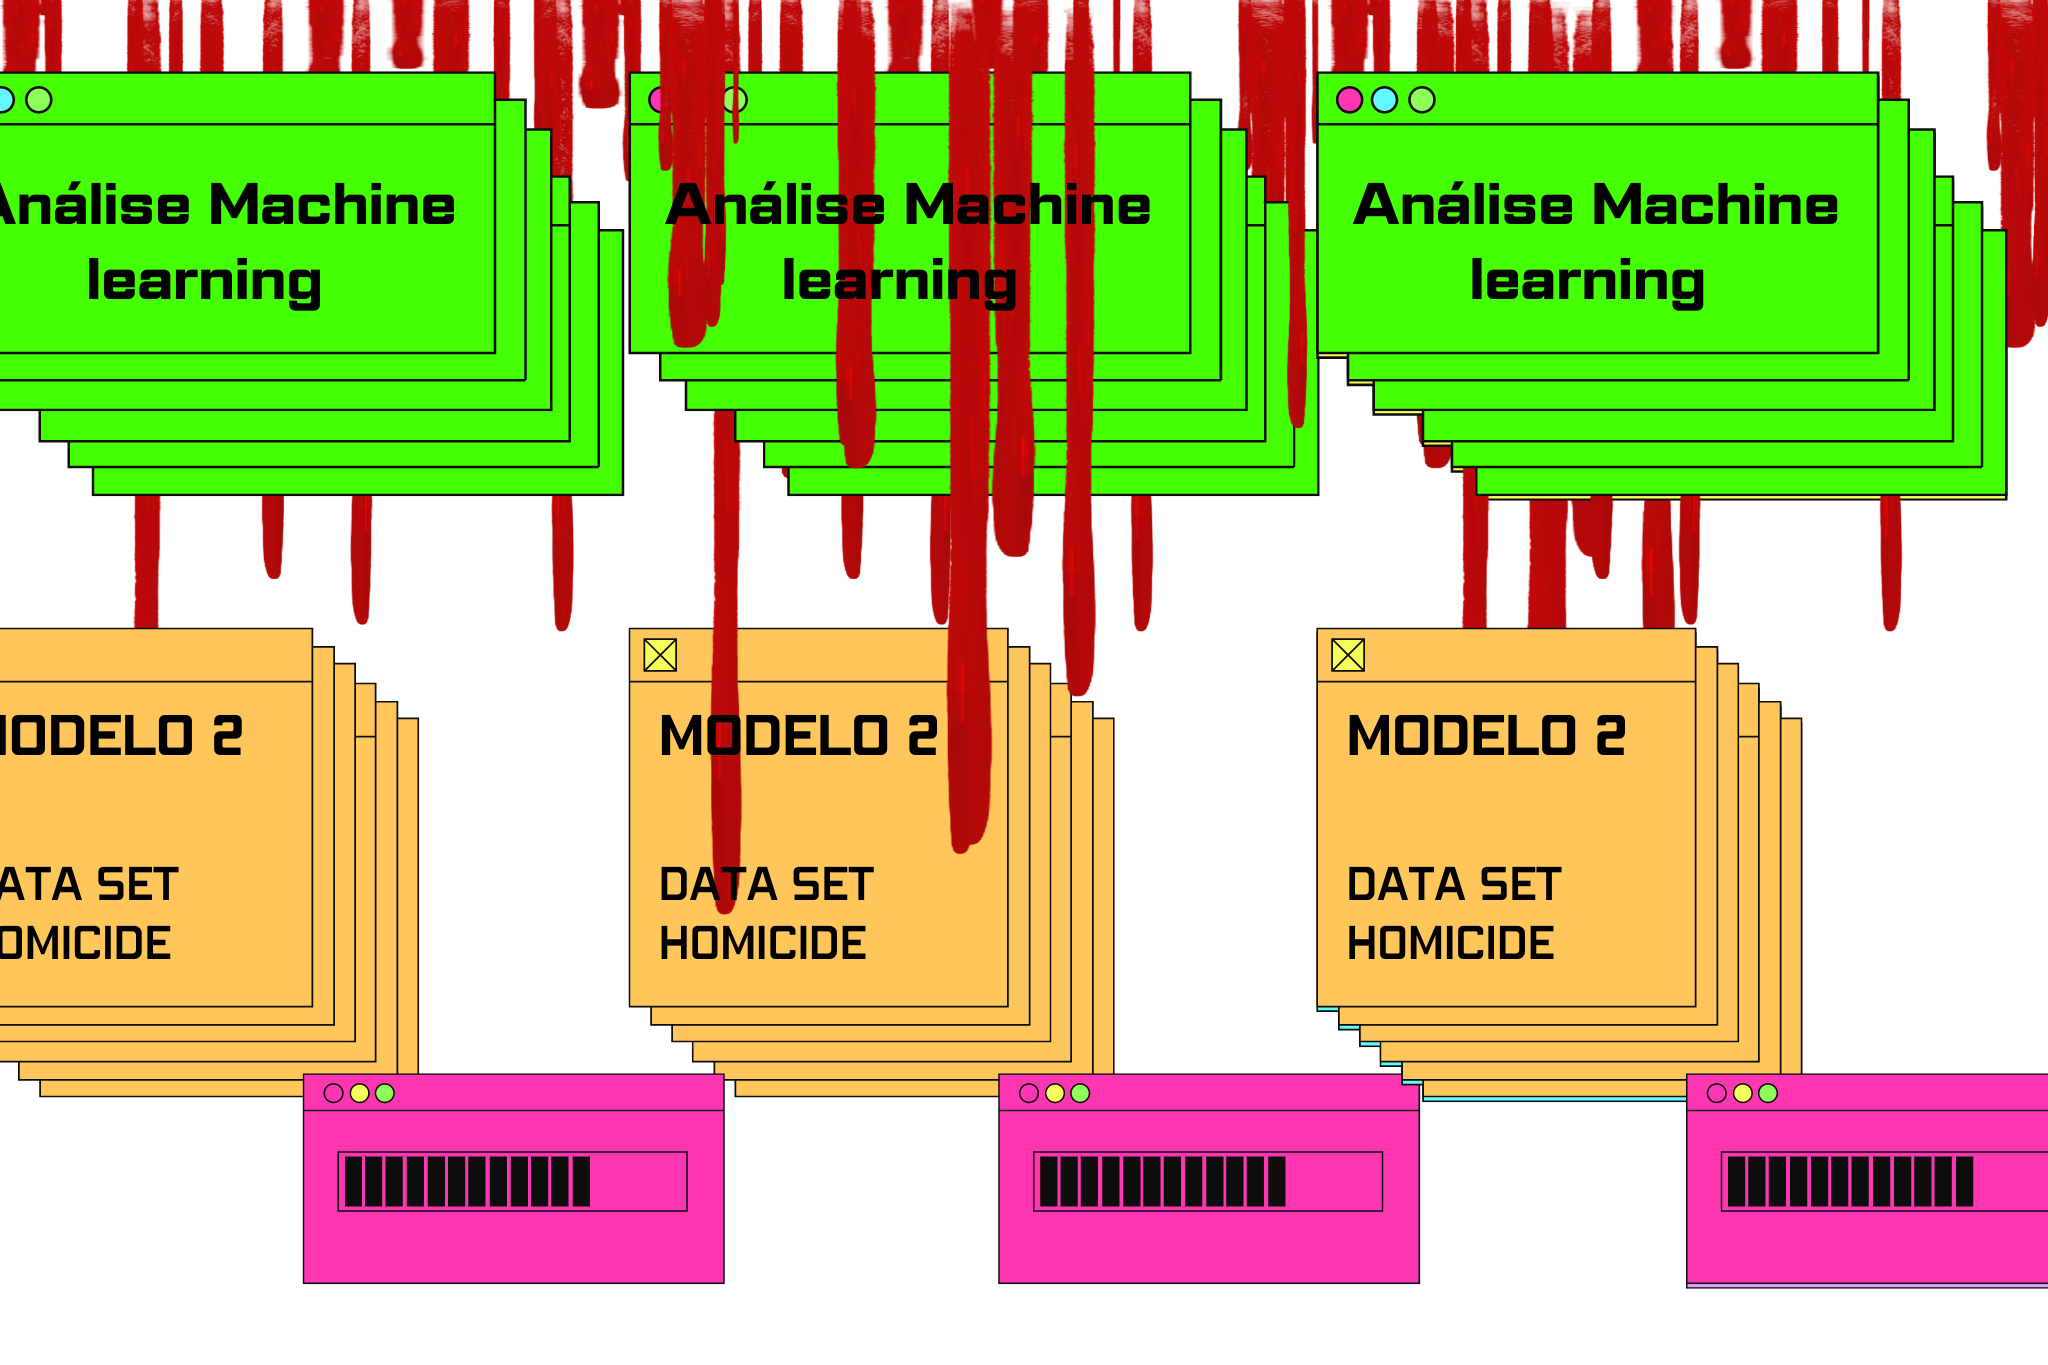

In [28]:
!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e4f67cfb673d211c88ca9e84990170bba30272ccf0d3e2d776f0454930a67ebe
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [29]:
# Importação das Bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



In [30]:
# Carregar o dataset
data = pd.read_csv("homicide-data.csv", encoding="ISO-8859-1")
df = data[[ 'victim_race', 'victim_age', 'victim_sex', 'state', 'disposition']]

# Análise Explorátória e processamento de dados

In [31]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Depois de ler o report feito pelo pandas começamos pesquisar a repetição de dados, pra saber o quanto de valores únicos cada coluna tem e o que cada um pode significar. Com isso percebemos a grande presenças do Unknown que é algo diferente de nan, que pode ser valores nulos ou inválidos.

In [32]:

for column in df.columns:

    value_counts = df[column].value_counts(dropna=False)
    print(f"Contagem de valores únicos na coluna '{column}':\n{value_counts}\n")


Contagem de valores únicos na coluna 'victim_race':
Black       33361
Hispanic     6901
White        6333
Unknown      4199
Other         700
Asian         685
Name: victim_race, dtype: int64

Contagem de valores únicos na coluna 'victim_age':
Unknown    2999
22         2116
21         2097
23         2061
24         1995
           ... 
97            3
96            2
101           1
99            1
102           1
Name: victim_age, Length: 102, dtype: int64

Contagem de valores únicos na coluna 'victim_sex':
Male       40739
Female      7209
Unknown     4231
Name: victim_sex, dtype: int64

Contagem de valores únicos na coluna 'state':
CA    6288
TX    5891
IL    5535
PA    3668
MO    2867
MD    2827
MI    2519
TN    2281
FL    2120
LA    1858
OH    1778
NV    1381
DC    1345
IN    1322
OK    1255
GA    1219
NY    1148
wI    1115
NC     963
AZ     914
AL     801
MA     614
KY     576
VA     429
NE     409
NM     378
MN     366
CO     312
Name: state, dtype: int64

Contagem de valores 

In [33]:
nan = df.isna().sum()
print(nan)

victim_race    0
victim_age     0
victim_sex     0
state          0
disposition    0
dtype: int64


In [34]:
nulos = df.isnull().sum()
print(nulos)

victim_race    0
victim_age     0
victim_sex     0
state          0
disposition    0
dtype: int64


In [35]:
unknown_conta = df.eq('Unknown').sum()
print(unknown_conta)

victim_race    4199
victim_age     2999
victim_sex     4231
state             0
disposition       0
dtype: int64


In [36]:
df.head()

,victim_race,victim_age,victim_sex,state,disposition
0,Hispanic,78,Male,NM,Closed without arrest
1,Hispanic,17,Male,NM,Closed by arrest
2,White,15,Female,NM,Closed without arrest
3,Hispanic,32,Male,NM,Closed by arrest
4,White,72,Female,NM,Closed without arrest


In [37]:
coluna_a_codificar = 'victim_race'

le_victim_race = LabelEncoder()
df[coluna_a_codificar] = le_victim_race.fit_transform(df[coluna_a_codificar])
le_victim_race.fit_transform(df.loc[:, coluna_a_codificar])


array([2, 2, 5, ..., 1, 1, 1])

Agora ao em vez de criar os label enconding iremos usar o médoto de colunas dummies, que ira criar colunas numéricas para cada dado única de colunas não numéricas. Apenas a idade que iremos preencher o unknown com o valor zero, e mudar o resto para numérica direto ja que elas são basicamente números


In [38]:
df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce').fillna(0)

Aqui criar um algoritimo para separar as faixas de idade para diminuir as colunas e depoius torna-las dummies.

In [39]:
min_age = df['victim_age'].min()
max_age = df['victim_age'].max()
print(min_age)
print(max_age)

0.0
102.0


In [40]:
intervalos = list(np.arange(min_age, max_age + 1, step=15))  # Intervalos de 15 anos

intervalos.append(max_age + 1)

categorias_idade = pd.cut(df['victim_age'], bins=intervalos, labels=[f'{intervalos[i-1]}-{intervalos[i]-1}' for i in range(1, len(intervalos))])

contagem_por_intervalo = categorias_idade.value_counts()

contagem_por_intervalo = contagem_por_intervalo.sort_index()

print(contagem_por_intervalo)


0.0-14.0       1853
15.0-29.0     25435
30.0-44.0     13113
45.0-59.0      6251
60.0-74.0      1645
75.0-89.0       456
90.0-102.0       42
Name: victim_age, dtype: int64


In [41]:
df.head()

,victim_race,victim_age,victim_sex,state,disposition
0,2,78.0,Male,NM,Closed without arrest
1,2,17.0,Male,NM,Closed by arrest
2,5,15.0,Female,NM,Closed without arrest
3,2,32.0,Male,NM,Closed by arrest
4,5,72.0,Female,NM,Closed without arrest


In [42]:

intervalos = [0, 14, 29, 44, 49, 74, 89, df['victim_age'].max() + 1]


df['age_category'] = pd.cut(df['victim_age'], bins=intervalos, labels=[f'victim_age{intervalo}-{intervalos[i+1]-1}' for i, intervalo in enumerate(intervalos[:-1])])


df = pd.get_dummies(df, columns=['age_category'], prefix='', prefix_sep='')



Colunas Dummies das idades criadas

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   victim_race         52179 non-null  int64  
 1   victim_age          52179 non-null  float64
 2   victim_sex          52179 non-null  object 
 3   state               52179 non-null  object 
 4   disposition         52179 non-null  object 
 5   victim_age0-13      52179 non-null  uint8  
 6   victim_age14-28     52179 non-null  uint8  
 7   victim_age29-43     52179 non-null  uint8  
 8   victim_age44-48     52179 non-null  uint8  
 9   victim_age49-73     52179 non-null  uint8  
 10  victim_age74-88     52179 non-null  uint8  
 11  victim_age89-102.0  52179 non-null  uint8  
dtypes: float64(1), int64(1), object(3), uint8(7)
memory usage: 2.3+ MB


In [44]:

df = pd.get_dummies(df, columns=['victim_sex','state', 'disposition'])
print(df.columns)


Index(['victim_race', 'victim_age', 'victim_age0-13', 'victim_age14-28',
       'victim_age29-43', 'victim_age44-48', 'victim_age49-73',
       'victim_age74-88', 'victim_age89-102.0', 'victim_sex_Female',
       'victim_sex_Male', 'victim_sex_Unknown', 'state_AL', 'state_AZ',
       'state_CA', 'state_CO', 'state_DC', 'state_FL', 'state_GA', 'state_IL',
       'state_IN', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_MI',
       'state_MN', 'state_MO', 'state_NC', 'state_NE', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_PA', 'state_TN', 'state_TX',
       'state_VA', 'state_wI', 'disposition_Closed by arrest',
       'disposition_Closed without arrest', 'disposition_Open/No arrest'],
      dtype='object')


In [45]:
# Padronização
# É o redimensionamento dos recursos para criar um “padrão” garantindo
# que os novos dados tenham média zero e desvio padrão igual a 1
scaler = StandardScaler()

# Salvando os novos dados já padronizados:
X = scaler.fit_transform(df)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("victim_race", axis=1), df["victim_race"], test_size=0.2, random_state=42)


In [47]:
X_train.shape, X_test.shape

((41743, 42), (10436, 42))

# PCA

In [48]:
from sklearn.decomposition import PCA

# Suponha que você já tenha definido X_train e X_test

# Número de componentes principais desejado
p = 5

# Aplica o PCA aos dados de treinamento
pca_train = PCA(n_components=p)
X_train_pca = pca_train.fit_transform(X_train)

# Aplica o PCA aos dados de teste usando as mesmas transformações aprendidas nos dados de treinamento
X_test_pca = pca_train.transform(X_test)

explained_var_ratio_train = pca_train.explained_variance_ratio_.cumsum()
total_variancia_train = pca_train.explained_variance_ratio_.sum()

explained_var_ratio_test = (pca_train.transform(X_test) ** 2).sum(axis=1) / ((X_test - X_test.mean(axis=0)) ** 2).sum(axis=0).sum()
total_variancia_test = explained_var_ratio_test.sum()

print(f'O modelo PCA com {p} variáveis explica {100 * total_variancia_train:.2f}% dos dados de treinamento')
print(f'O modelo PCA com {p} variáveis explica {100 * total_variancia_test:.2f}% dos dados de teste')


O modelo PCA com 5 variáveis explica 99.55% dos dados de treinamento
O modelo PCA com 5 variáveis explica 99.54% dos dados de teste


In [49]:
 # Número de vezes que você deseja executar o PCA
num_iterations = 100

explained_variances = []

variance_threshold = 0.80

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_.cumsum()

optimal_n_components = np.argmax(explained_variance >= variance_threshold) + 1

print(f'Número de componentes para {variance_threshold * 100:.2f}% de variância explicada: {optimal_n_components}')

X_train_pca = X_train_pca[:, :optimal_n_components]
X_test_pca = pca.transform(X_test)[:, :optimal_n_components]

Número de componentes para 80.00% de variância explicada: 1


In [ ]:
# 4. Modelos e Avaliação
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModelo: {name}")
    print(f"Acurácia: {accuracy}")
    print(classification_report(y_test, y_pred))


Modelo: Random Forest
Acurácia: 0.6967228823303948
              precision    recall  f1-score   support

           0       0.04      0.01      0.01       144
           1       0.73      0.90      0.81      6609
           2       0.36      0.19      0.25      1408
           3       0.19      0.05      0.08       138
           4       0.99      0.99      0.99       829
           5       0.37      0.19      0.25      1308

    accuracy                           0.70     10436
   macro avg       0.44      0.39      0.40     10436
weighted avg       0.64      0.70      0.65     10436


Modelo: Logistic Regression
Acurácia: 0.6702759678037562
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.67      0.98      0.79      6609
           2       0.00      0.00      0.00      1408
           3       0.00      0.00      0.00       138
           4       0.69      0.61      0.64       829
           5       0.5

Comparando as duas análises, podemos observar algumas diferenças notáveis no desempenho dos modelos de classificação na tarefa de prever a raça da vítima com base nas características associadas ao crime.

Na primeira análise, que fornece uma visão geral dos modelos (Random Forest, Regressão Logística, SVM e KNN), vemos que os modelos variam em termos de acurácia geral e na capacidade de prever diferentes categorias de raça. Além disso, observamos que alguns modelos mostram uma forte inclinação para prever a categoria 1 corretamente, mas têm dificuldade em prever outras categorias. Isso sugere que as características predominantes estão concentradas na categoria 1 e que os modelos têm dificuldade em lidar com a variação nas características das outras raças.

Na segunda análise, que fornece métricas de precisão, recall e F1-score para cada modelo, essas diferenças se tornam mais evidentes. Por exemplo, o modelo Random Forest mostra uma precisão relativamente alta na categoria 1, mas uma precisão muito baixa na categoria 0. O mesmo acontece com os modelos Regressão Logística, SVM e KNN. Além disso, observamos que o recall (a capacidade de identificar corretamente as instâncias positivas) é muito baixo para algumas categorias, indicando que esses modelos têm dificuldade em recuperar adequadamente as instâncias de algumas raças.

Em resumo, ambas as análises indicam que os modelos têm desempenho desigual na tarefa de prever a raça da vítima com base nas características do crime. Eles mostram uma tendência para prever com precisão a categoria 1, mas têm dificuldade em lidar com a variação nas características das outras raças, resultando em baixos valores de precisão, recall e F1-score para essas categorias. Isso pode sugerir que o conjunto de dados pode estar desequilibrado ou que as características associadas a algumas raças são mais proeminentes e previsíveis do que outras. Mais análises e possivelmente a coleta de mais dados podem ser necessárias para melhorar o desempenho dos modelos nessas categorias sub-representadas.

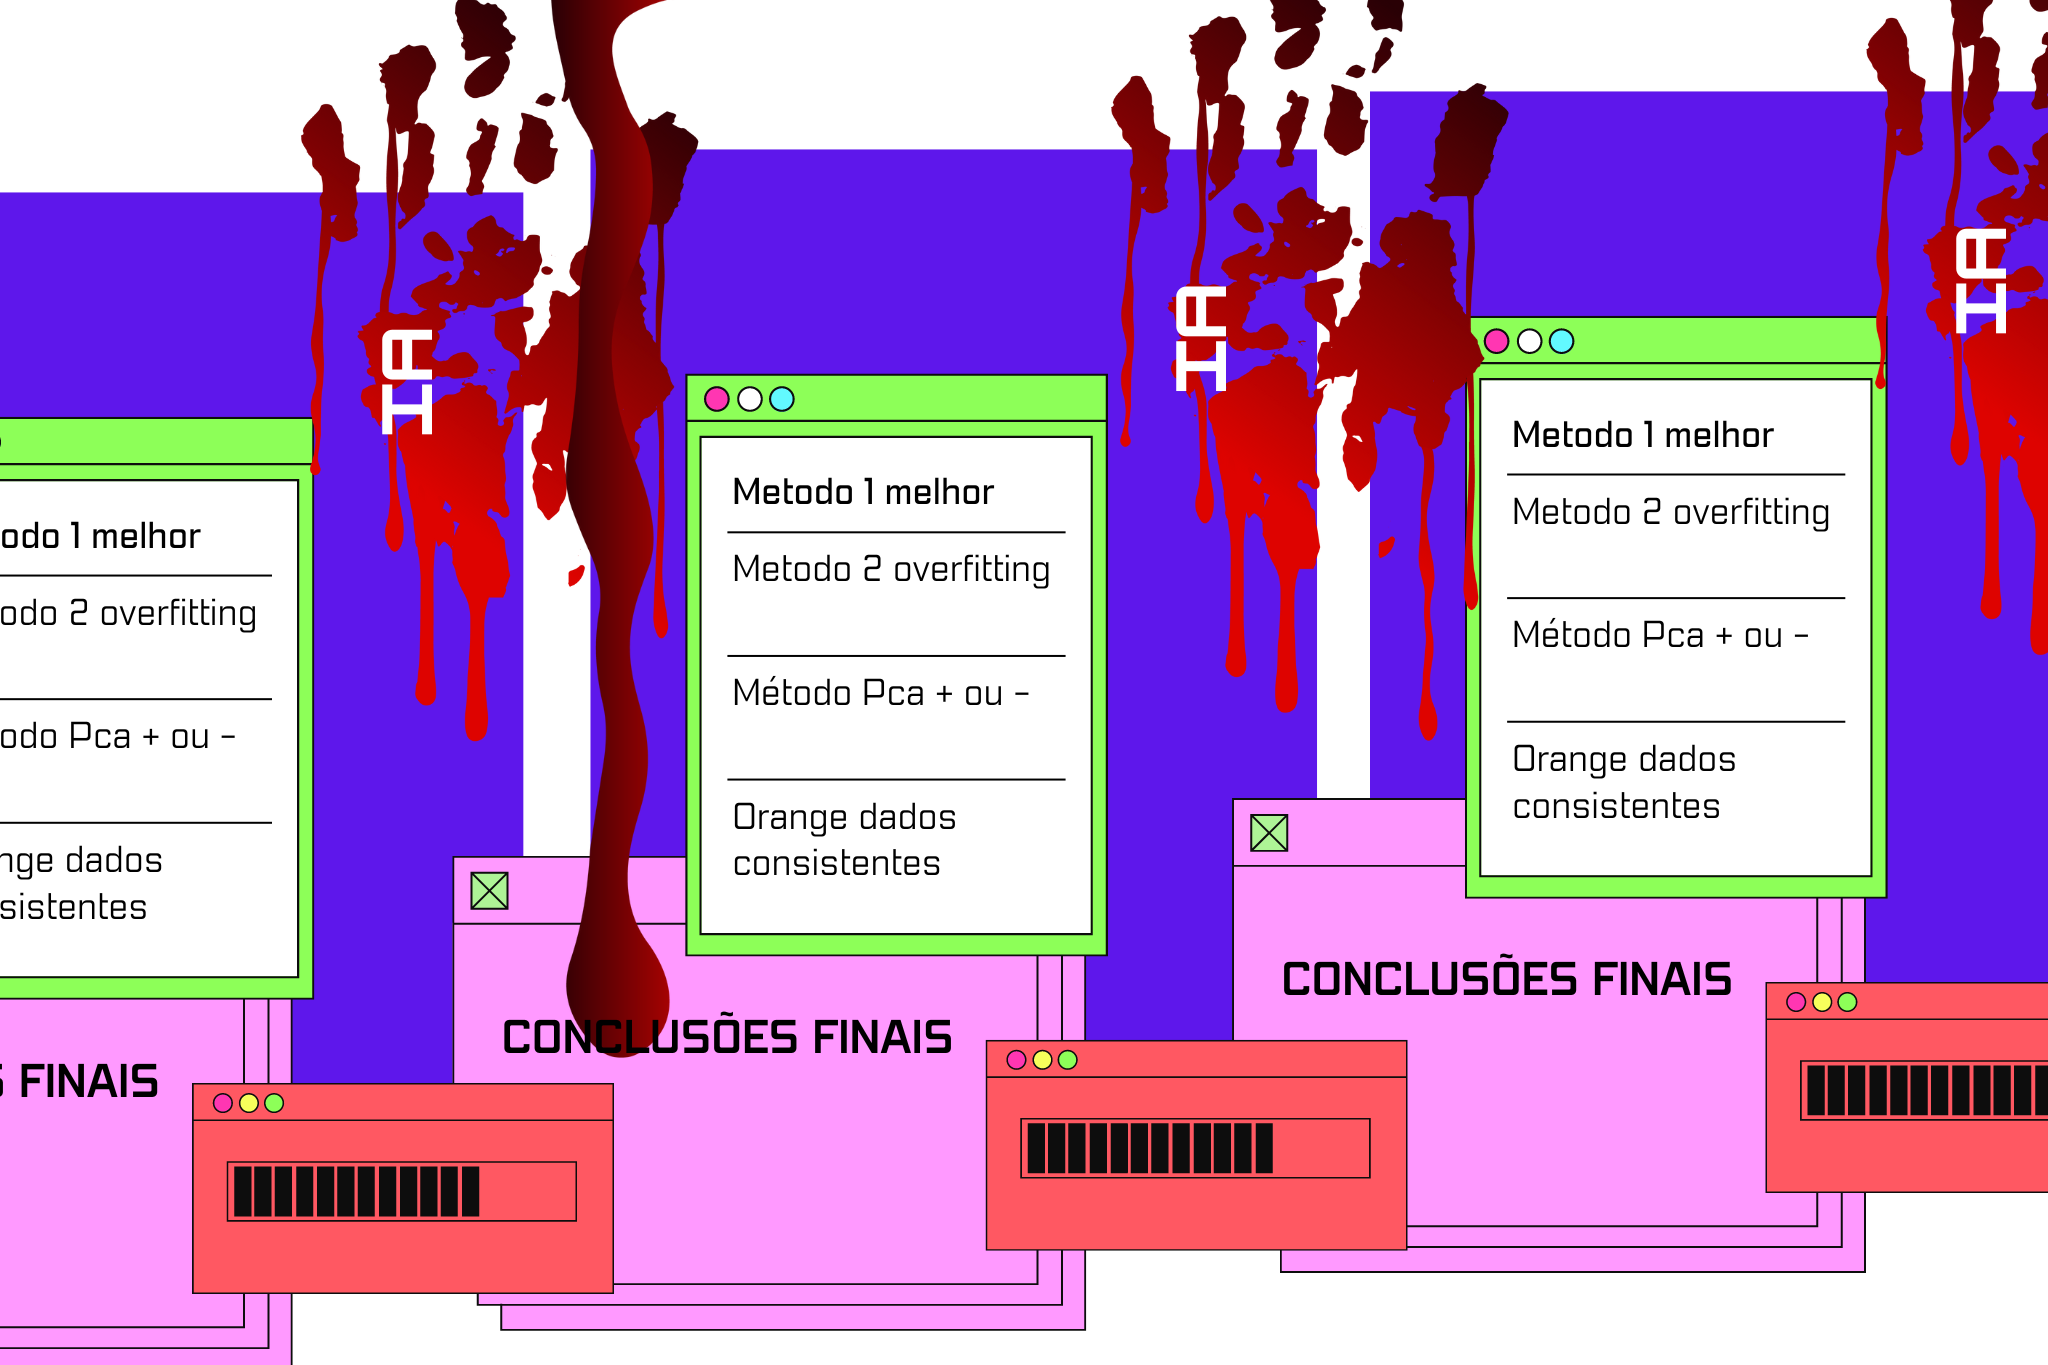

## Conclusão Final

Após uma análise detalhada dos modelos e técnicas utilizadas, podemos concluir que a primeira abordagem foi mais eficaz em relação à segunda análise. Isso ocorre porque na segunda análise, parece ter ocorrido um overfitting, pois é quase impossível de ser alcançado 100% de compreensão dos dados quando a dimensionalidade reduzida de 42 para 1.

Além disso, ao longo de nossa análise, notamos que muitos atributos que originalmente continham informações em formato de strings foram descartados, uma vez que não apresentavam variação significativa ou informações distintivas, como nomes ou sobrenomes. Além disso, identificamos atributos altamente correlacionados, como cidade e estado, que também foram removidos para simplificar o modelo.

Por fim, ao realizar a análise exploratória dos dados, percebemos que, neste caso específico, a aplicação do PCA (Análise de Componentes Principais) pode não ter sido a melhor escolha, uma vez que a limpeza inicial dos dados já resultou em uma redução significativa na quantidade de colunas. No entanto, é importante destacar que o método empregado no software Orange produziu resultados consistentes com a média de acurácia observada em nossos dados.



### Questão Extra (+1.00 ponto)

- Além da resolução em Python, apresente uma solução para a Questão 03 utilizando o software Orange Data Mining.

- Anexe o arquivo .ows (do Orange) juntamente com o arquivo deste notebook.
